# Assignment 2(due on 11/08)

## Student:余哲（12332280），Gtihub：atheistmao

## 批改人：吴昊天

## 得分：55/40

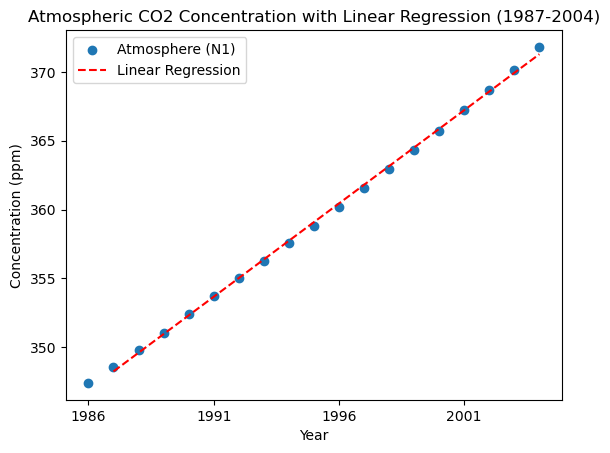

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the emissions data
emissions_data = pd.read_csv('global_1751_2016.csv')

# Filter relevant columns
emissions_data = emissions_data[['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)',
                                  'Carbon emissions from cement production']]

# Calculate the net carbon emissions by subtracting emissions from cement production
emissions_data['NetCarbonEmissions'] = emissions_data['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - emissions_data['Carbon emissions from cement production']

# Convert net carbon emissions to γ values
emissions_data['Gamma'] = emissions_data['NetCarbonEmissions'] / (1000 * 2.13)

# Define parameters
k12 = 105 / 740
k21 = 102 / 900

# Time parameters
start_year = 1986  # Adjusted start year
end_year = 2004    # Adjusted end year
time_step = 1

# Initial conditions
N1 = 740 / 2.13
N2 = 900 / 2.13

# Time array
time = np.arange(start_year, end_year + time_step, time_step)

# Lists to store results
atmosphere = [N1]
ocean = [N2]


# Euler's method
for t in range(start_year, end_year , time_step):
    # Get γ value for the current year
    gamma = emissions_data.loc[emissions_data['Year'] == t, 'Gamma'].values[0]

    dN1_dt = -k12 * atmosphere[-1] + k21 * ocean[-1] + gamma
    dN2_dt = k12 * atmosphere[-1] - k21 * ocean[-1]

    N1_new = atmosphere[-1] + dN1_dt * time_step
    N2_new = ocean[-1] + dN2_dt * time_step

    atmosphere.append(N1_new)
    ocean.append(N2_new)

# Perform linear regression
X = np.array(time[1:]).reshape(-1, 1)
y = np.array(atmosphere[1:]).reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X, y)
line = regressor.predict(X)

# Plotting the results
plt.scatter(time, atmosphere, label='Atmosphere (N1)')
plt.plot(time[1:], line, color='red', linestyle='--', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration with Linear Regression (1987-2004)')
plt.legend()

# Set x-axis ticks with 5-year intervals
plt.xticks(np.arange(start_year, end_year + 1, 5))

plt.show()

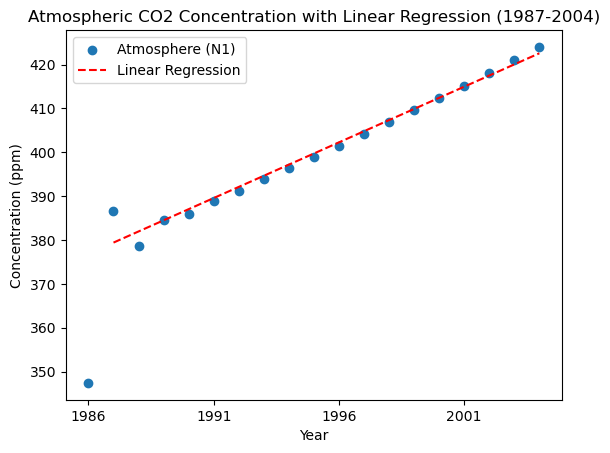

In [2]:
# Define parameters
k12 = 105 / 740
k21 = 102 / 900
N2_0 = 821 / 2.13

# Time parameters
start_year = 1986  # Adjusted start year
end_year = 2004    # Adjusted end year
time_step = 1

# Initial conditions
N1 = 740 / 2.13
N2 = 900 / 2.13


# Time array
time = np.arange(start_year, end_year + time_step, time_step)

# Lists to store results
atmosphere_with_buffer = [N1]
ocean_with_buffer = [N2]


# Euler's method
for t in range(start_year, end_year , time_step):
    # Get γ value for the current year
    gamma = emissions_data.loc[emissions_data['Year'] == t, 'Gamma'].values[0]

    # Calculate ξ value
    z = atmosphere_with_buffer[-1]  # Assuming z = N1 (atmosphere concentration)
    xi = 3.69 + 0.0189 * z - 0.0000018 * z**2

    dN1_dt = -k12 * atmosphere_with_buffer[-1] + k21 * (N2_0 + xi * (ocean_with_buffer[-1] - N2_0)) + gamma
    dN2_dt = k12 * atmosphere_with_buffer[-1] - k21 * (N2_0 + xi * (ocean_with_buffer[-1] - N2_0))

    N1_new = atmosphere_with_buffer[-1] + dN1_dt * time_step
    N2_new = ocean_with_buffer[-1] + dN2_dt * time_step

    atmosphere_with_buffer.append(N1_new)
    ocean_with_buffer.append(N2_new)

# Perform linear regression
X = np.array(time[1:]).reshape(-1, 1)
y = np.array(atmosphere_with_buffer[1:]).reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X, y)
line_with_buffer = regressor.predict(X)

# Plotting the results
plt.scatter(time, atmosphere_with_buffer, label='Atmosphere (N1)')
plt.plot(time[1:], line_with_buffer, color='red', linestyle='--', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration with Linear Regression (1987-2004)')
plt.legend()

# Set x-axis ticks with 5-year intervals
plt.xticks(np.arange(start_year, end_year + 1, 5))

plt.show()

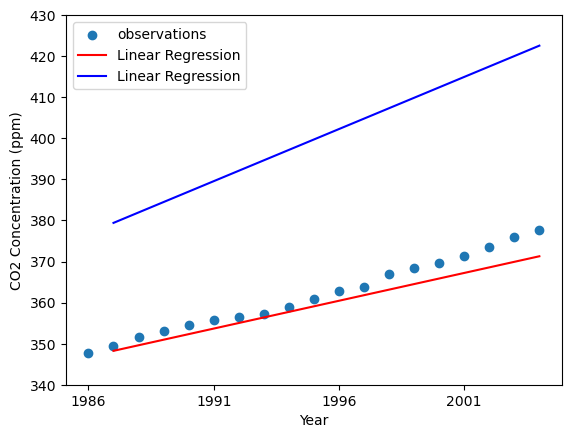

In [3]:
# Load the emissions data
observations = pd.read_csv('co2_annmean_mlo.csv')

# Filter data for the years 1986-2004
filtered_data = observations[(observations['year'] >= 1986) & (observations['year'] <= 2004)]

# Plotting the scatter plot
plt.scatter(filtered_data['year'], filtered_data['mean'], label="observations")
plt.plot(time[1:], line, color='red', linestyle='-', label='Linear Regression')
plt.plot(time[1:], line_with_buffer, color='blue', linestyle='-', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()

# Set x-axis ticks with 5-year intervals
plt.xticks(np.arange(start_year, end_year + 1, 5))
plt.ylim(340, 430)
plt.show()

C:\Users\Wu\AppData\Local\Temp\ipykernel_32596\3510294586.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_use_data['Delta'] = land_use_data['Global']/(1000*2.13)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


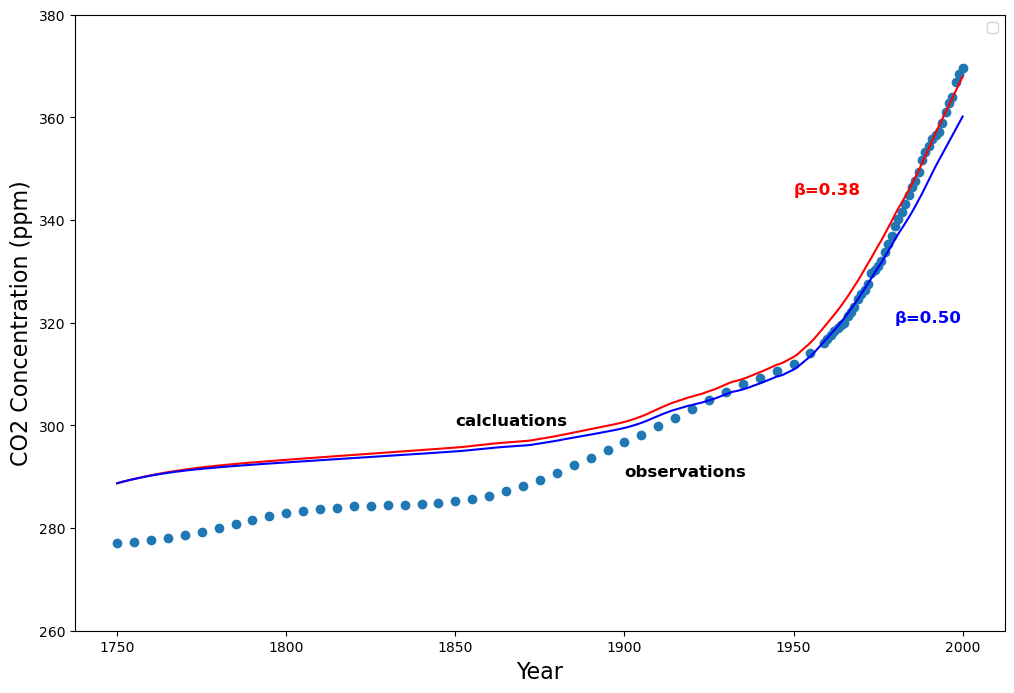

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the emissions data
observations = pd.read_csv('1750-2000CO2.csv')

# Load the emissions data
land_use = pd.read_excel('Global_land-use_flux-1750_2005.xls')
emissions_data = pd.read_csv('global_1751_2016.csv')

# Extract relevant columns
land_use_data = land_use[['Year', 'Global']]
land_use_data['Delta'] = land_use_data['Global']/(1000*2.13)

# Filter relevant columns
emissions_data = emissions_data[['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)',
                                  'Carbon emissions from cement production']]

# Calculate the net carbon emissions by subtracting emissions from cement production
emissions_data['NetCarbonEmissions'] = emissions_data['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - emissions_data['Carbon emissions from cement production']

# Convert net carbon emissions to γ values
emissions_data['Gamma'] = emissions_data['NetCarbonEmissions'] / (1000 * 2.13)

# Define parameters
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1238
N2_0 = 842 / 2.13

# Time parameters
start_year = 1750  # Adjusted start year
end_year = 2000    # Adjusted end year
time_step = 1

# Initial conditions
N1 = 615 / 2.13
N2 = 842 / 2.13
N3 = 9744 / 2.13
N4 = 26280 / 2.13
N5 = 90000000 / 2.13
N6 = 731 / 2.13
N7 = 1238 / 2.13

f0 = 62 / 2.13
P = atmosphere  # Replace with the appropriate variable
P0 = 615 / 2.13

# Beta values to explore
beta_values = [0.38, 0.5]

# Lists to store results for each beta
atmosphere_results = []

# Loop over beta values
for beta in beta_values:
    atmosphere = [N1]
    surface_ocean = [N2]
    intermediate_ocean = [N3]
    deep_ocean = [N4]
    sediments = [N5]
    biosphere = [N6]
    soil = [N7] 
    for t in range(start_year, end_year , time_step):
        f = [f0 * (1 + beta * np.log(atmosphere[-1] / P0))]
        gamma = emissions_data.loc[emissions_data['Year'] == t, 'Gamma'].values[0]
        delta = land_use_data.loc[land_use_data['Year'] == t, 'Delta'].values[0]
        
        # Calculate ξ value
        z = atmosphere[-1]  # Assuming z = N2 (ocean concentration)
        xi = 3.69 + 0.0186 * z - 0.0000018 * z**2

        # Update additional parameters for the formula f=f0(1+beta*ln（P/P0）)
        P = atmosphere[-1]  # Replace with the appropriate variable

        dN1_dt = -k12 * atmosphere[-1] + k21 * (N2_0 + xi * (surface_ocean[-1] - N2_0)) + gamma - f[-1] + delta + k51 * sediments[-1] + k71 * soil[-1]
        dN2_dt = k12 * atmosphere[-1] - k21 * (N2_0 + xi * (surface_ocean[-1] - N2_0)) - k23 * surface_ocean[-1] + k32 * intermediate_ocean[-1] - k24 * surface_ocean[-1]
        dN3_dt = k23 * surface_ocean[-1] - k32 * intermediate_ocean[-1] - k34 * intermediate_ocean[-1] + k43 * deep_ocean[-1]
        dN4_dt = k34 * intermediate_ocean[-1] - k43 * deep_ocean[-1] + k24 * surface_ocean[-1] - k45 * deep_ocean[-1]
        dN5_dt = k45 * deep_ocean[-1] - k51 * sediments[-1]
        dN6_dt = f[-1] - k67 * biosphere[-1] - 2 * delta
        dN7_dt = k67 * biosphere[-1] - k71 * soil[-1] + delta

        N1_new = atmosphere[-1] + dN1_dt * time_step
        N2_new = surface_ocean[-1] + dN2_dt * time_step
        N3_new = intermediate_ocean[-1] + dN3_dt * time_step
        N4_new = deep_ocean[-1] + dN4_dt * time_step
        N5_new = sediments[-1] + dN5_dt * time_step
        N6_new = biosphere[-1] + dN6_dt * time_step
        N7_new = soil[-1] + dN7_dt * time_step

        atmosphere.append(N1_new)
        surface_ocean.append(N2_new)
        intermediate_ocean.append(N3_new)
        deep_ocean.append(N4_new)
        sediments.append(N5_new)
        biosphere.append(N6_new)
        soil.append(N7_new)

    # Append atmospheric concentrations for the current beta
    atmosphere_results.append(atmosphere)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plotting the scatter plot
plt.scatter(observations['year'], observations['mean'])

plt.text(1850, 300, 'calcluations', fontsize=12, fontweight='bold')
plt.text(1900, 290, 'observations', fontsize=12, fontweight='bold')
plt.text(1950, 345, 'β=0.38', fontsize=12, fontweight='bold',color='red')
plt.text(1980, 320, 'β=0.50', fontsize=12, fontweight='bold',color='blue')

plt.plot(range(start_year, end_year + time_step, time_step), atmosphere_results[0],color='red')
plt.plot(range(start_year, end_year + time_step, time_step), atmosphere_results[1],color='blue')

plt.xlabel('Year', fontsize=16)
plt.ylabel('CO2 Concentration (ppm)', fontsize=16)
plt.ylim(260,380)
plt.legend()
plt.show()